# CH2-P1: Key Skills 1
## Gabriele C. Sosso

## The Ergodic Principle: a Pythonic Tale

In this session, we are going to play around with the ergodic principle, a key concept in statistical mechanics. To this end, we will use some computational tools, most notably...

### Jupyter notebooks

**This!** is actually a Jupyter notebook! It allows you to:

- Write down some text
- Write computer programs using a number of languages: we are going to use Python
- Visualize the outcome of your calculations
- Take advantage of powerful computational tools

All of this in one place! Now, a Jupyter notebook is a collection of "cells" - blocks within which we can e.g. write down an equation or plot a function. We will use "Markdown cells" to write down text and equations, and "Code cells" to do everything else. Cells can be inserted (and copied, and pasted, and cut!) via the toolbar above. Once we are happy with the content of a given cell, we have to "Run" it - to execute it, by holding the shift key and hitting the enter/return key. The Jupyter notebook will take care of running the cell, and let us know if everything is ok. You can also run a cell, or indeed all the cells in a notebook, via the same toolbar above. Let's have a look at Markdown and Code cells, then...

### This is a Markdown cell
Thus, we can write into it! To edit the cell, a double click of the mouse should do.
We can write play around with **bold text**, *italic text*, 
# Big Headings, 
## Small Headings, 
### Tiny Headings,
and much more. Importantly, we can also write down equations using LaTeX syntax:

$$
A_{\text{Macroscopic}}=\langle a_{\text{Microscopic}} \rangle_{\text{NVE}}=\frac{1}{N}\sum_{i=1}^{N}a_i
$$

Remember, LaTeX may look daunting at the beginning, but it is the best documented markup language in the world, and after a little while it becomes natural. In fact, journal articles and books are ultimately *all* typesetted in LaTeX!

In [1]:
string = "This is a Code cell"
print(string) 

This is a Code cell


### Wait, what happened?
In the cell above, we actually used some Python already! We did two things:

- 1. We have stored some text (**This is a code cell**) into a *variable* we have called **string**
- 2. We have printed the variable **string**

Great - now that we know everything about Markdown and Code cells, we have what we need to make a start...

# The Ergodic Principle

In the previous lecture we have seen that in order to estimate the value of a certain macroscopic quantity, such as the temperature $\mathcal{T}$ of a system, we can calculate an *ensemble average* of the temperature of several (the more the better!) microscopic configuration of the same system. Assuming we are working in a microcanonical ensemble $NVE$ with $N$ microscopic configurations (each one characterised by a certain temperature $T_i$), we have:

$$
\mathcal{T}=\langle T \rangle_{\text{NVE}}=\frac{1}{N}\sum_{i=1}^{N} T_i
$$

However, we have also seen that the outcome of molecular dynamics simulations (one of the most common computational tools to explore the phase space!) consist in a *trajectory* - that is, a collection of configurations of *the same* microscopic configuration propagated in time. But then, what do we do with it? Luckily, if we assume that we have run our simulation long enough for that particular configuration to have explored the whole of the phase space accessible to the system, then we can apply the so-called **ergodic principle**:

$$
\mathcal{T}=\langle T \rangle_{\text{NVE}}=\frac{1}{N}\sum_{i=1}^{N} T_i = \lim_{t\to\infty}\int_0^t T_i \ dt'
$$

That is, if the system has explored in time the entire phase space, then *we can take a time average instead of an ensemble average*. Note that the time average in the equation above is expressed in the form of an integral. In molecular dynamics, though, time is not continuous - it is discrete, in that we evolve the system in time via subsequent *timesteps* $\Delta t$, i.e. small time windows. In addition, at a certain point (after $N_{\Delta t}$ timestpes) a molecular dynamics run will have to stop, so that we cannot explore the phase space indefinitely. Thus, we write:

$$
\mathcal{T}=\langle T \rangle_{\text{NVE}}=\frac{1}{N}\sum_{i=1}^{N} T_i = \frac{1}{N_{\Delta t}\cdot\Delta t}\sum_{j=1}^{N_{\Delta t}} T(\Delta t_j)
$$

Is this actually true? We are about to find out!

### Ensemble average
We start by looking at the temperature of ten different microscopic configurations of the same systems (a box containing 2000 water molecules). Just ten? Yes, because in order to generate them, I had to run ten different, *statistically independent* molecular dynamics simulations. Now, these temperatures are stored in a file, "temperature_ensemble.dat" which contains to columns: the first column is just an index (1, 2... 10), the second one contains the temperatures we are interested in. Time to code...

In [2]:
# This is a comment - the # tells Python to just ignore whatever follows

# First things first, we are going to "ake advantage of powerful computational tools"
# Specifically, we are going to "import" the numpy lubrary - an incredibly useful set of of Pythonic tools
# that will save us a lot of time when dealing with numbers. off we go...

import numpy as np # We can now use numpy, and because we are lazy, each time we use it we are going to call it 
                   #via "np" as opposed to "numpy


# We store the name of the file we want to read (temperature_ensemble.dat) into a variable (file_name_ensemble):

file_name_ensemble = "temperature_ensemble.dat"


# We use the "loadtxt" tool provided by numpy (which we have called by "np.loadtxt") to read 
# the whole content of the file into the variable t_ensemble

t_ensemble = np.loadtxt(file_name_ensemble)


# Let's have a look at the "t_ensemble" variable:

print(t_ensemble)

[[   1.    295.23]
 [   2.    302.42]
 [   3.    302.61]
 [   4.    289.72]
 [   5.    303.2 ]
 [   6.    301.55]
 [   7.    302.1 ]
 [   8.    292.39]
 [   9.    295.12]
 [  10.    297.61]]


In [3]:
# What did we do? Well, it turns out the "t_ensemble" variable is actually a two-dimensional array!
# No need to panic, though. We can actually select just the first column of it:

print(t_ensemble[:,0])

[  1.   2.   3.   4.   5.   6.   7.   8.   9.  10.]


In [4]:
# Wait, what? Well, in order to access a certain element of an array, we use the following syntax:
# name_of_the_array[index of the row, index of the column]
# In the example above, ":" means "use the whole column", while "0" actually stands for the first column
# Why? Because in Python the numbering of the array elements starts from zero, not from one!
# For example, in order to access the third element of the second column of "t_ensemble"...

print(t_ensemble[2,1])

302.61


In [5]:
# Great! In order to compute the temperature as an ensemble average from these data, then, we just sum of the elements 
# in the second column of "t_ensemble", and then divide the result by ten. This is one way to do it:

ensemble_average=np.sum(t_ensemble[:,1])/len(t_ensemble[:,1])
print(ensemble_average)


# We have used the "sum" tool of numpy (which we have called by "np.sum") to sum all the elements in
# the second column of "t_ensemble". We have also divided by ten, i.e. the length of "t_ensemble" which
# we have extracted via the "len" command. 

298.195


### Ensemble average
We start by looking at the temperature of ten different microscopic configurations of the same systems (a box containing 2000 water molecules). Just ten? Yes, because in order to generate them, I had to run ten different, *statistically independent* molecular dynamics simulations. Now, these temperatures are stored in a file, "temperature_ensemble.dat" which contains to columns: the first column is just an index (1, 2... 10), the second one contains the temperatures we are interested in. Time to code...

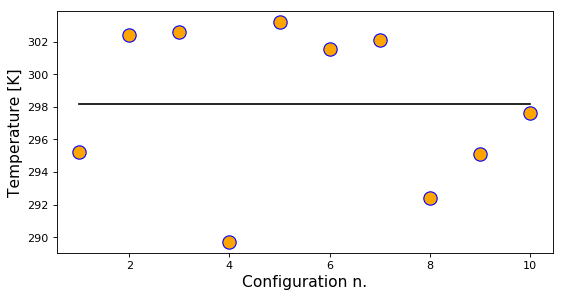

In [6]:
# Now, can we have a look at the data - and at the ensemble average we have just calculated, please?
# Of course we can! We start by importing another very useful set of tools: matplotlib,
# which can plot basically everything you want in whatever fashion you like!

# The following two lines have to do with formatting figures nicely...
%matplotlib notebook 
%matplotlib inline 
import matplotlib.pyplot as plt


plt.figure(figsize=(8, 4), dpi= 80, facecolor='w', edgecolor='k') # figsize determine the actual size of the figure
plt.plot((1, 10), (ensemble_average, ensemble_average), 'k-') # Draw a line indicating the ensemble average
# Plot the temperature
plt.plot(t_ensemble[:,0], t_ensemble[:,1], 'o', markerfacecolor='orange', markersize=12, markeredgecolor='blue', 
         linewidth=2.5)
# Labeling of x and y axes
plt.xlabel('Configuration n.',fontsize=14)
plt.ylabel('Temperature [K]',fontsize=14)
# Show the final result
plt.show()

### Time average
Now, we compute the time average of the temperature along a molecular dynamics trajectory. Speaking of which, why not having a look at that as well?

In [7]:
import MDAnalysis
from MDAnalysis import Universe
import warnings
warnings.filterwarnings('ignore')
import nglview as nv
from nglview.datafiles import PDB, XTC


pdbf = "water.pdb"
traj_all = "trj.xtc"
universe = Universe(pdbf,traj_all)
print(universe.trajectory)

<XTCReader trj.xtc with 2501 frames of 8000 atoms>


In [8]:
w = nv.show_mdanalysis(universe)
w.clear_representations()
w.add_representation('ball+stick', selection='water')
w

A Jupyter Widget

The system is the same as above (a box containing 2000 water molecules), but in this case we are going to look at how exactly the temperature changes in time...

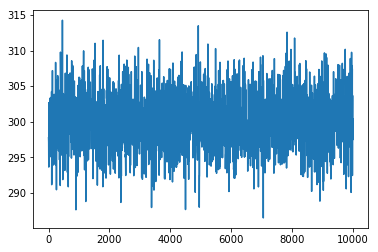

In [10]:
file_name_MD = "temperature_MD.dat"
t_MD = np.loadtxt(file_name_MD)
plt.plot(t_MD[:,0], t_MD[:,1])
plt.show()